population: 10 growth factor: 0.16306380537190754 carrying capacity: 3159.3658154108057
population: 11 growth factor: 0.16306380537190754 carrying capacity: 3161.822393567317
population: 13 growth factor: 0.16306380537190754 carrying capacity: 3159.437203335206
population: 15 growth factor: 0.16306380537190754 carrying capacity: 3144.3044711041116
population: 17 growth factor: 0.16306380537190754 carrying capacity: 3123.781073466288
population: 20 growth factor: 0.16306380537190754 carrying capacity: 3091.496902328506
population: 23 growth factor: 0.16306380537190754 carrying capacity: 3023.446425843464
population: 26 growth factor: 0.16306380537190754 carrying capacity: 2937.486877021595
population: 31 growth factor: 0.16306380537190754 carrying capacity: 2830.8628124358206
population: 35 growth factor: 0.16306380537190754 carrying capacity: 2725.915421236073
population: 41 growth factor: 0.16306380537190754 carrying capacity: 2575.326236603774
population: 48 growth factor: 0.16306380

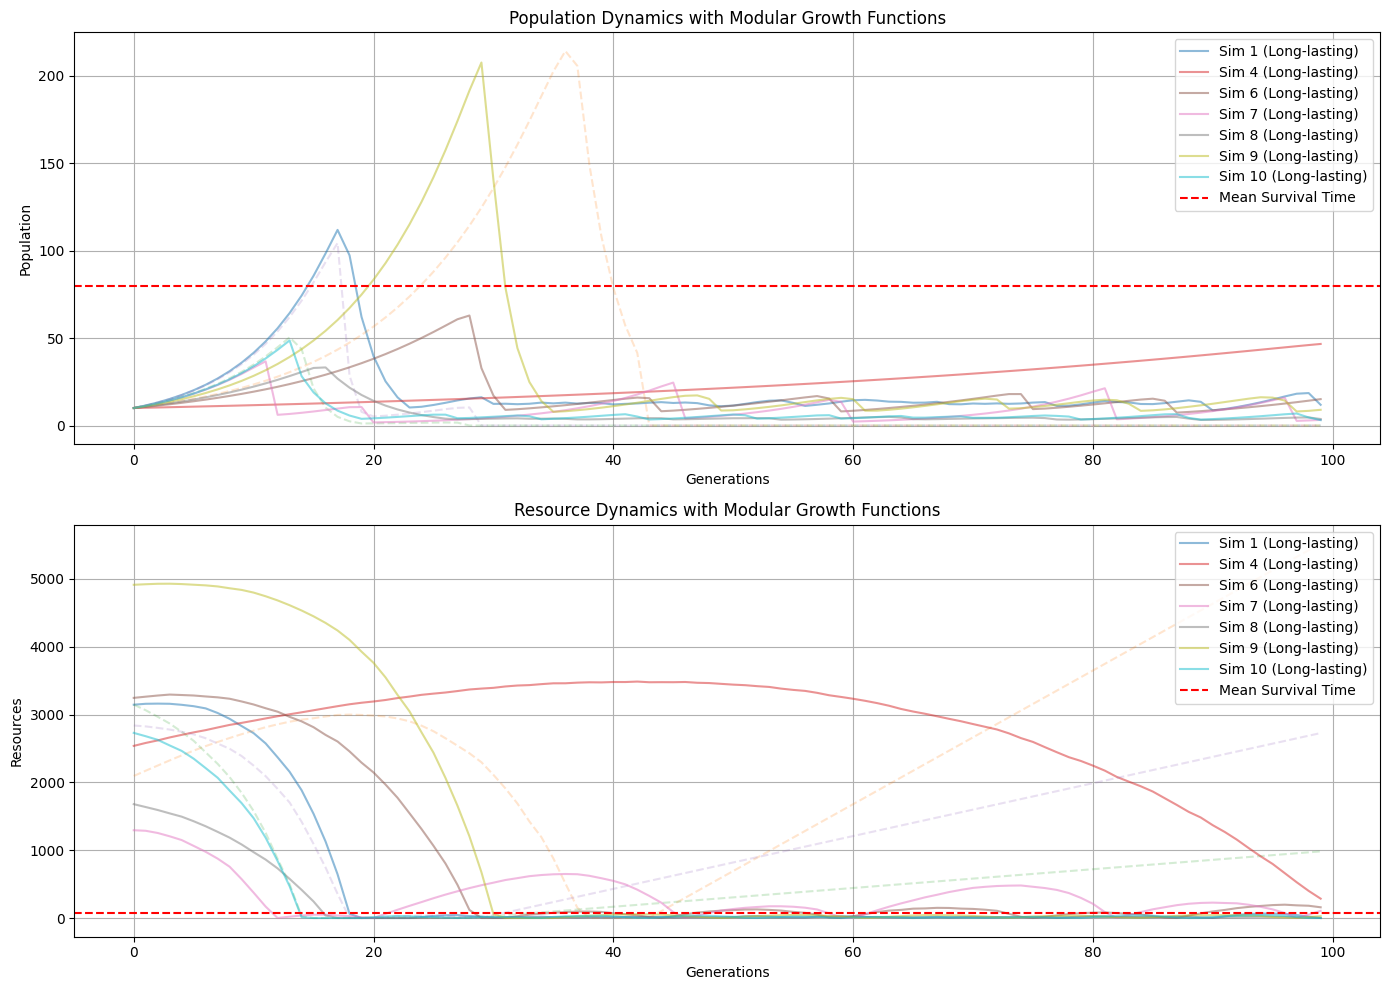

(7, 80.0)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the evolutionary model
generations = 100  # Simulation duration
num_simulations = 10  # Number of simulations for diversity
initial_fitness = 1.0  # Starting fitness value
p_benefit = 0.5  # Probability of a beneficial change
gain_percentage = 0.1  # Percent increase in fitness for beneficial changes
loss_percentage = 0.05  # Percent decrease in fitness for negative changes

# Extinction thresholds
resource_extinction_threshold = 1  # Minimum resources required to sustain population
population_extinction_threshold = 1  # Minimum population size

# Randomized parameter ranges
initial_resource_range = (500, 5000)  # Range of initial resources
resource_replenishment_range = (10, 100)  # Range of resource replenishment rates
resource_consumption_range = (1, 10)  # Range of resource consumption per individual
population_growth_factor_range = (0.01, 0.2)  # Growth rate based on available resources
population_decline_factor_range = (0.1, 0.9)  # Decline rates during resource shortages
fitness_impact_on_consumption_range = (0.9, 1.1)  # Fitness affects resource consumption minimally

# Storage for results
all_populations = np.zeros((num_simulations, generations))
all_resources = np.zeros((num_simulations, generations))
randomized_params = []

# Functions for modularity
def update_fitness(prev_fitness, p_benefit, gain_percentage, loss_percentage):
    """Update fitness based on random beneficial or detrimental changes."""
    if np.random.rand() < p_benefit:
        return prev_fitness + gain_percentage * prev_fitness
    else:
        return prev_fitness - loss_percentage * prev_fitness

def update_resources(prev_resources, population, consumption_rate, fitness_factor, replenishment_rate):
    """Update resources based on consumption and replenishment."""
    adjusted_consumption = population * consumption_rate * fitness_factor
    return max(prev_resources - adjusted_consumption + replenishment_rate, 0)

def calculate_population_growth(population, growth_factor, carrying_capacity):
    """Calculate population growth with density effects."""
    effective_growth_rate = growth_factor * (1 - population / carrying_capacity)
    population_density_modifier = population / (population + 1)
    return population * effective_growth_rate * population_density_modifier

# Run simulations
for sim in range(num_simulations):
    print(f"Running simulation {sim + 1}...")

    # Randomize parameters for this simulation
    initial_resources = np.random.uniform(*initial_resource_range)
    resource_replenishment_rate = np.random.uniform(*resource_replenishment_range)
    resource_consumption_per_individual = np.random.uniform(*resource_consumption_range)
    population_growth_factor = np.random.uniform(*population_growth_factor_range)
    population_decline_factor = np.random.uniform(*population_decline_factor_range)

    # Store parameters for analysis
    randomized_params.append((initial_resources, resource_replenishment_rate, resource_consumption_per_individual,
                              population_growth_factor, population_decline_factor))

    # Initialize variables
    resources = np.zeros(generations)
    population = np.zeros(generations)
    fitness = np.ones(generations)  # Initialize fitness with neutral impact
    resources[0] = initial_resources
    population[0] = 10  # Starting population size

    # Simulate with modular functions
    for t in range(1, generations):
        # Update fitness
        fitness[t] = update_fitness(fitness[t - 1], p_benefit, gain_percentage, loss_percentage)

        # Scale resource consumption by fitness impact
        fitness_factor = np.random.uniform(*fitness_impact_on_consumption_range)

        # Update resources
        resources[t] = update_resources(resources[t - 1], population[t - 1],
                                         resource_consumption_per_individual,
                                         fitness_factor, resource_replenishment_rate)

        # Calculate carrying capacity based on resources
        carrying_capacity = max(resources[t], 1)  # Avoid division by zero

        # Calculate population growth
        print(f"population: {int(population[t - 1])} growth factor: {population_growth_factor} carrying capacity: {carrying_capacity}")
        population_growth = calculate_population_growth(population[t - 1], population_growth_factor, carrying_capacity)

        # Update population
        if resources[t] >= resource_extinction_threshold:
            population[t] = population[t - 1] + population_growth
        else:
            # Resource depletion causes population decline
            population[t] = max(population[t - 1] - population[t - 1] * population_decline_factor, 0)

        # Check for population extinction
        if population[t] < population_extinction_threshold:
            population[t] = 0  # Population goes extinct

    print(f"Simulation {sim + 1} completed.")
    print("")
    # Store results for this simulation
    all_populations[sim, :] = population
    all_resources[sim, :] = resources

# Re-calculate survival times
survival_times = [
    np.argmax(all_populations[sim, :] == 0) if 0 in all_populations[sim, :] else generations
    for sim in range(num_simulations)
]

mean_survival_time = np.mean(survival_times)

# Re-identify long-lasting simulations
long_lasting_simulations = [sim for sim in range(num_simulations) if survival_times[sim] > mean_survival_time]

# Plot results
plt.figure(figsize=(14, 10))

# Population dynamics
plt.subplot(2, 1, 1)
for sim in range(num_simulations):  # Plot all simulations
    if sim in long_lasting_simulations:
        plt.plot(range(generations), all_populations[sim, :], alpha=0.5, label=f"Sim {sim + 1} (Long-lasting)" if sim < 10 else None)
    else:
        plt.plot(range(generations), all_populations[sim, :], alpha=0.2, linestyle="--")
plt.axhline(mean_survival_time, color="red", linestyle="--", label="Mean Survival Time")
plt.xlabel("Generations")
plt.ylabel("Population")
plt.title("Population Dynamics with Modular Growth Functions")
plt.legend(loc="upper right")
plt.grid(True)

# Resource dynamics
plt.subplot(2, 1, 2)
for sim in range(num_simulations):  # Plot all simulations
    if sim in long_lasting_simulations:
        plt.plot(range(generations), all_resources[sim, :], alpha=0.5, label=f"Sim {sim + 1} (Long-lasting)" if sim < 10 else None)
    else:
        plt.plot(range(generations), all_resources[sim, :], alpha=0.2, linestyle="--")
plt.axhline(mean_survival_time, color="red", linestyle="--", label="Mean Survival Time")
plt.xlabel("Generations")
plt.ylabel("Resources")
plt.title("Resource Dynamics with Modular Growth Functions")
plt.legend(loc="upper right")
plt.grid(True)

plt.tight_layout()
plt.show()

# Display summary of long-lasting simulations and mean survival time
len(long_lasting_simulations), mean_survival_time


In [57]:
# Identify the top 10 populations by their maximum population size during the simulation
top_10_indices = np.argsort([np.max(all_populations_fitness[sim, :]) for sim in range(num_simulations)])[-10:]

# Plot the top 10 populations
plt.figure(figsize=(12, 8))

import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add the top 10 populations to the plot
for rank, sim in enumerate(top_10_indices, start=1):
    fig.add_trace(go.Scatter(
        x=list(range(generations)),
        y=all_populations_fitness[sim, :],
        mode='lines',
        name=f"Top {rank}: Sim {sim + 1}"
    ))

# Update layout
fig.update_layout(
    title="Top 10 Populations Over Generations (Interactive)",
    xaxis_title="Generations",
    yaxis_title="Population",
    #yaxis_type="log",  # Logarithmic scale
    template="plotly_white"
)

# Show the plot
fig.show()





<Figure size 1200x800 with 0 Axes>

In [ ]:
from pprint import pprint as pp
for rank, sim in enumerate(top_10_indices, start=10):
    print(f"-----------SIMULATION {sim}")
    print(f"Rank: {rank}")
    population_list = list(all_populations_fitness[sim, :])
    #make each an integer
    population_list = [int(i) for i in population_list]
    pp(population_list)
    print("")

-----------SIMULATION 3
Rank: 10
[10,
 10,
 11,
 12,
 12,
 13,
 14,
 14,
 15,
 16,
 17,
 18,
 20,
 21,
 23,
 24,
 26,
 28,
 30,
 32,
 34,
 37,
 40,
 43,
 25,
 15,
 9,
 5,
 6,
 6,
 7,
 8,
 9,
 5,
 6,
 7,
 8,
 9,
 5,
 6,
 6,
 7,
 9,
 10,
 6,
 6,
 7,
 8,
 9,
 5,
 6,
 7,
 8,
 9,
 5,
 6,
 7,
 9,
 5,
 6,
 7,
 9,
 5,
 6,
 7,
 9,
 5,
 6,
 7,
 8,
 10,
 6,
 6,
 7,
 4,
 5,
 6,
 8,
 9,
 11,
 6,
 7,
 9,
 5,
 6,
 7,
 8,
 9,
 5,
 6,
 7,
 9,
 5,
 6,
 7,
 9,
 5,
 6,
 8,
 10,
 6,
 7,
 8,
 5,
 6,
 7,
 8,
 10,
 6,
 3,
 4,
 5,
 6,
 8,
 9,
 11,
 14,
 8,
 5,
 6,
 8,
 11,
 6,
 8,
 5,
 6,
 8,
 11,
 6,
 9,
 5,
 8,
 4,
 7,
 9,
 13,
 8,
 5,
 6,
 9,
 5,
 8,
 11,
 6,
 9,
 5,
 8,
 11,
 7,
 4,
 5,
 8,
 11,
 7,
 9,
 5,
 8,
 5,
 8,
 12,
 7,
 11,
 7,
 4,
 6,
 9,
 14,
 8,
 5,
 8,
 13,
 8,
 5,
 9,
 18,
 11,
 6,
 15,
 9,
 5,
 14,
 8,
 5,
 12,
 7,
 4,
 10,
 24,
 14,
 8,
 5,
 13,
 8,
 4,
 13,
 8,
 4,
 15,
 9,
 5,
 18,
 11,
 6,
 20,
 12,
 7,
 21,
 13,
 7,
 4,
 13,
 8,
 5,
 14,
 8,
 5,
 16,
 9,
 6,
 18,
 11,
 6,
 4,
 12,
 7,
 